# Part A: Build a classification model using text data

In part one of the homework, you will solve a text classification task.

The training data is stored in the HW 4 data folder. You can import it and train test split it to generate your data for this assignment.

Use cross-validation to evaluate the results. Use a robust metric for classification  (AUC or F1-Score for example), and inspect all models by visualizing the coefficients. (See helper function in our in class notebook for text models.)

To complete part one of the homework do the following:

Import the text data, vectorize the clickbait headline column into an X matrix.  Then run logistic regression at least three times and select a single best model.  Note that you should create three logistic regression models with different different tokenization approaches.  You should not change your modeling approach, you should simply experiment with different tokenizers. Be sure to explain your choices and evaluate your models using cross validation and using test set data.

## Import text data

In [ ]:
#Import Python libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [ ]:
#read text data
import pandas as pd
text = pd.read_csv("X_train.csv", squeeze=True)
y_labels = pd.read_csv("y_train.csv", squeeze=True)

# ohe encode Y data
y = pd.get_dummies(y_labels)

In [ ]:
y.head()

,clickbait,not clickbait
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X_train, X_test, y_train, y_test = train_test_split(text, y_labels, stratify=y_labels, random_state=73)


In [ ]:
print(text.shape)
X_train.shape

(24979,)


(18734,)

In [ ]:
print(y_labels.shape)
y_train.shape

(24979,)


(18734,)

In [ ]:
X_train.head()

1330     Loss of Tax Revenues Is Felt Acutely in West, ...
7790     Meet Diane Warren, Whose Songs You've Been Rui...
10973    Mario Draghi succeeds Antonio Fazio as Bank of...
18328                         When You're Not Over Your Ex
20104    31 Real-Life Bridal Parties Who Nailed The Mix...
Name: headline, dtype: object

In [ ]:
y_train.head()

1330     not clickbait
7790         clickbait
10973    not clickbait
18328        clickbait
20104        clickbait
Name: label, dtype: object

## Tokenizer 1

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)
X = vect.transform(X_train)
print("X:\n{}".format(repr(X)))

X:
<18734x17858 sparse matrix of type '<class 'numpy.int64'>'
	with 165127 stored elements in Compressed Sparse Row format>


In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 210 to 230:\n{}".format(feature_names[210:230]))
print("Every 200th feature:\n{}".format(feature_names[::200]))

Number of features: 17858
First 20 features:
['00', '000', '000th', '00s', '01', '05', '08', '08m', '09', '10', '100', '1000', '100m', '100th', '100ºf', '101', '102', '103', '104', '106']
Features 210 to 230:
['42nd', '43', '431', '435', '44', '440', '447', '44th', '45', '450', '452', '455', '46', '460', '468', '47', '48', '48th', '49', '491']
Every 200th feature:
['00', '3nd', 'abused', 'afghan', 'altercation', 'anymore', 'assassinate', 'ayala', 'basf', 'benz', 'blip', 'bradford', 'bugging', 'cameras', 'cation', 'cheerleading', 'cleaner', 'comcast', 'consent', 'coulton', 'cruz', 'dawns', 'demi', 'difference', 'divorce', 'drm', 'eerie', 'engine', 'exam', 'fakhravar', 'fiedler', 'flourishing', 'freman', 'gazans', 'go', 'grinder', 'hand', 'heavyweights', 'homage', 'hurdles', 'inanimate', 'insults', 'istanbul', 'joseline', 'kickback', 'laguna', 'leicester', 'livestream', 'macarena', 'mario', 'meats', 'migraines', 'molossian', 'muqtada', 'nerve', 'novel', 'openoffice', 'overtime', 'pastry'

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Logistic regression with cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

scores = cross_val_score(LogisticRegression(), X, y_train, cv=5)
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.97


### Tune parameters using Gridsearch CV

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X, y_train)
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best cross-validation score: 0.9685
Best parameters:  {'C': 10}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Xtest = vect.transform(X_test)
print("Test score: {:.4f}".format(grid.score(Xtest, y_test)))

Test score: 0.9704


In [ ]:
cv_score = []
test_score = []

cv_score.append(grid.best_score_)
test_score.append(grid.score(Xtest, y_test))

### Using AUC

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score

lr = LogisticRegressionCV(scoring='roc_auc', cv=5, max_iter=1000)
lr_1 = lr.fit(X, y_train)
print("AUC train score: {:.4f}".format(lr_1.score(X, y_train)))

AUC train score: 0.9999


In [ ]:
print("AUC test score: {:.4f}".format(lr_1.score(Xtest, y_test)))

AUC test score: 0.9956


In [ ]:
AUC_train = []
AUC_test = []

AUC_train.append(lr_1.score(X, y_train))
AUC_test.append(lr_1.score(Xtest, y_test))

### Visualizing the coefficients

In [ ]:
# helper function to plot top positive and negative coefficients

def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


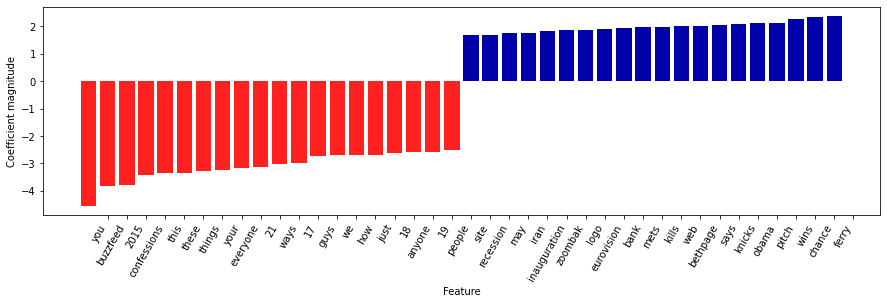

In [ ]:
import matplotlib.pyplot as plt

coefs = lr_1.coef_
feature_names = vect.get_feature_names()

visualize_coefficients(coefs, feature_names, n_top_features=20)

## Tokenizer 2: Narrow bag of words to words in at least 10 documents

In [ ]:
vect2 = CountVectorizer(min_df=10).fit(X_train)
X2 = vect2.transform(X_train)
print("X with min_df: {}".format(repr(X2)))

X with min_df: <18734x2526 sparse matrix of type '<class 'numpy.int64'>'
	with 130649 stored elements in Compressed Sparse Row format>


In [ ]:
feature_names2 = vect2.get_feature_names()
print("Number of features: {}".format(len(feature_names2)))
print("First 20 features:\n{}".format(feature_names2[:20]))
print("Features 210 to 230:\n{}".format(feature_names2[210:230]))
print("Every 200th feature:\n{}".format(feature_names2[::200]))

Number of features: 2526
First 20 features:
['000', '00s', '08', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1989', '20', '200', '2000s', '2005', '2006']
Features 210 to 230:
['atlantic', 'attack', 'attacks', 'attempt', 'audience', 'australia', 'australian', 'author', 'authorities', 'auto', 'autumn', 'avoid', 'awakens', 'award', 'awards', 'away', 'awesome', 'awkward', 'babies', 'baby']
Every 200th feature:
['000', 'as', 'canada', 'culture', 'excited', 'governor', 'italy', 'march', 'oscar', 'random', 'share', 'taught', 'vines']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Logistic regression with cross validation

In [ ]:
scores2 = cross_val_score(LogisticRegression(), X2, y_train, cv=5)
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(scores2)))

Mean cross-validation accuracy: 0.9656


### Gridsearch CV

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X2, y_train)
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best cross-validation score: 0.9656
Best parameters:  {'C': 10}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Xtest2 = vect2.transform(X_test)
print("Test score: {:.4f}".format(grid.score(Xtest2, y_test)))

cv_score.append(grid.best_score_)
test_score.append(grid.score(Xtest2, y_test))

Test score: 0.9653


### AUC

In [ ]:
lr_2 = lr.fit(X2, y_train)
print("AUC train score: {:.4f}".format(lr_2.score(X2, y_train)))
print("AUC test score: {:.4f}".format(lr_2.score(Xtest2, y_test)))

AUC_train.append(lr_2.score(X2, y_train))
AUC_test.append(lr_2.score(Xtest2, y_test))

AUC train score: 0.9993
AUC test score: 0.9947


### Visualizaztion

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


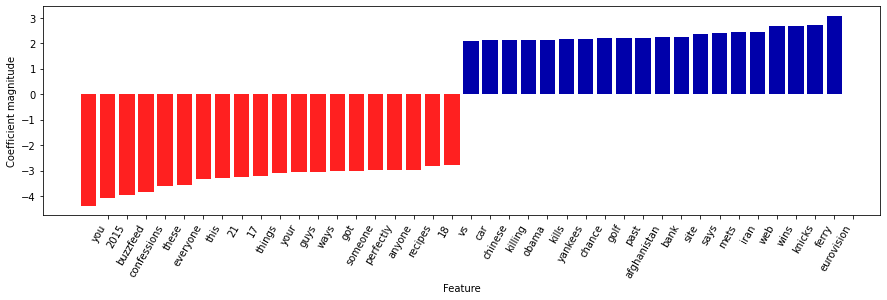

In [ ]:
coefs2 = lr_2.coef_
feature_names2 = vect2.get_feature_names()

visualize_coefficients(coefs2, feature_names2, n_top_features=20)

## Tokenizer 3: deleting Stop-words

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['please', 'describe', 'whereafter', 'whole', 'no', 'since', 'against', 'own', 'enough', 'other', 'cry', 'now', 'put', 'also', 'fill', 'twenty', 'an', 'ours', 'than', 'amongst', 'though', 'amoungst', 'another', 'upon', 'becoming', 'thence', 'several', 'five', 'had', 'again', 'first', 'back']


In [ ]:
vect3 = CountVectorizer(min_df=5, stop_words="english").fit(X_train)
X3 = vect3.transform(X_train)
print("X with stop words:\n{}".format(repr(X3)))

X with stop words:
<18734x4294 sparse matrix of type '<class 'numpy.int64'>'
	with 88959 stored elements in Compressed Sparse Row format>


In [ ]:
feature_names3 = vect3.get_feature_names()
print("Number of features: {}".format(len(feature_names3)))
print("First 20 features:\n{}".format(feature_names3[:20]))
print("Features 210 to 230:\n{}".format(feature_names3[210:230]))
print("Every 200th feature:\n{}".format(feature_names3[::200]))

Number of features: 4294
First 20 features:
['000', '00s', '08', '09', '10', '100', '11', '12', '120', '13', '14', '15', '16', '17', '18', '19', '1989', '20', '200', '2000s']
Features 210 to 230:
['airstrikes', 'airways', 'al', 'alabama', 'alan', 'alarm', 'alaska', 'album', 'albums', 'alcohol', 'alcoholic', 'alert', 'alex', 'alice', 'alive', 'allegations', 'alleged', 'allegedly', 'allen', 'alliance']
Every 200th feature:
['000', 'aim', 'bags', 'buffalo', 'clashes', 'crucial', 'dog', 'exploration', 'fun', 'hedge', 'iowa', 'lawyers', 'massachusetts', 'nerve', 'people', 'protect', 'resolution', 'self', 'spirit', 'tallest', 'tsunami', 'wikimedia']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Logistic regression with cross validation

In [ ]:
scores3 = cross_val_score(LogisticRegression(), X3, y_train, cv=5)
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(scores3)))

Mean cross-validation accuracy: 0.9453


### Gridsearch CV

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X3, y_train)
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best cross-validation score: 0.9453
Best parameters:  {'C': 1}


In [ ]:
Xtest3 = vect3.transform(X_test)
print("Test score: {:.4f}".format(grid.score(Xtest3, y_test)))

cv_score.append(grid.best_score_)
test_score.append(grid.score(Xtest3, y_test))

Test score: 0.9444


### AUC

In [ ]:
lr_3 = lr.fit(X3, y_train)
print("AUC train score: {:.4f}".format(lr_3.score(X3, y_train)))
print("AUC test score: {:.4f}".format(lr_3.score(Xtest3, y_test)))

AUC_train.append(lr_3.score(X3, y_train))
AUC_test.append(lr_3.score(Xtest3, y_test))

AUC train score: 0.9988
AUC test score: 0.9884


### Visualizaztion

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


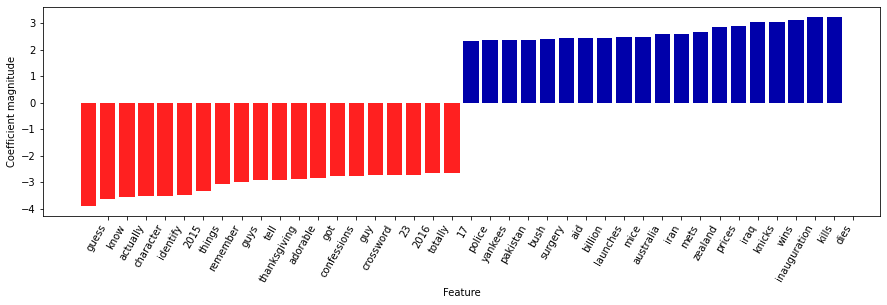

In [ ]:
coefs3 = lr_3.coef_
feature_names3 = vect3.get_feature_names()

visualize_coefficients(coefs3, feature_names3, n_top_features=20)

We can see that deleting stop words removes words such as "you", "your", "these" and gives us more sense on what non-clickbait headlines look like.

## Tokenizer 4: Rescaling the Data with tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect4 = TfidfVectorizer(min_df=5, norm=None).fit(X_train)
X4 = vect4.transform(X_train)
print("X with tf-idf:\n{}".format(repr(X4)))

X with tf-idf:
<18734x4516 sparse matrix of type '<class 'numpy.float64'>'
	with 143586 stored elements in Compressed Sparse Row format>


In [ ]:
feature_names4 = vect4.get_feature_names()
print("Number of features: {}".format(len(feature_names4)))
print("First 20 features:\n{}".format(feature_names4[:20]))
print("Features 210 to 230:\n{}".format(feature_names4[210:230]))
print("Every 200th feature:\n{}".format(feature_names4[::200]))

Number of features: 4516
First 20 features:
['000', '00s', '08', '09', '10', '100', '11', '12', '120', '13', '14', '15', '16', '17', '18', '19', '1989', '20', '200', '2000s']
Features 210 to 230:
['airline', 'airliner', 'airlines', 'airplane', 'airport', 'airstrikes', 'airways', 'al', 'alabama', 'alan', 'alarm', 'alaska', 'album', 'albums', 'alcohol', 'alcoholic', 'alert', 'alex', 'alice', 'alive']
Every 200th feature:
['000', 'ahmadinejad', 'autumn', 'breach', 'chicken', 'couple', 'dinner', 'equality', 'flags', 'growing', 'icelandic', 'karl', 'local', 'miss', 'official', 'planned', 'race', 'riots', 'share', 'starbucks', 'television', 'turns', 'what']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Logistic regression with cross validation

In [ ]:
scores4 = cross_val_score(LogisticRegression(), X4, y_train, cv=5)
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(scores4)))

Mean cross-validation accuracy: 0.9642


### Gridsearch CV

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X4, y_train)
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best cross-validation score: 0.9699
Best parameters:  {'C': 0.1}


In [ ]:
Xtest4 = vect4.transform(X_test)
print("Test score: {:.4f}".format(grid.score(Xtest4, y_test)))

cv_score.append(grid.best_score_)
test_score.append(grid.score(Xtest4, y_test))

Test score: 0.9705


### AUC

In [ ]:
lr_4 = lr.fit(X4, y_train)
print("AUC train score: {:.4f}".format(lr_4.score(X4, y_train)))
print("AUC test score: {:.4f}".format(lr_4.score(Xtest4, y_test)))

AUC_train.append(lr_4.score(X4, y_train))
AUC_test.append(lr_4.score(Xtest4, y_test))

AUC train score: 0.9998
AUC test score: 0.9956


### Visualizaztion

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


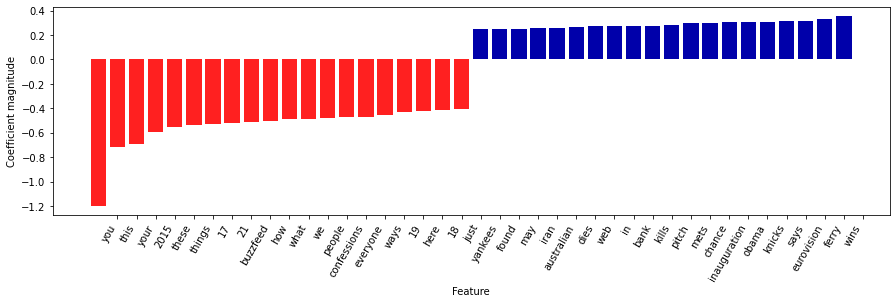

In [ ]:
coefs4 = lr_4.coef_
feature_names4 = vect4.get_feature_names()

visualize_coefficients(coefs4, feature_names4, n_top_features=20)

## Tokenizer 5: n-grams

In [ ]:
vect5 = TfidfVectorizer(ngram_range=(1,3) ,min_df=5, norm=None).fit(X_train)
X5 = vect5.transform(X_train)
print("X with 3-grams:\n{}".format(repr(X5)))

X with 3-grams:
<18734x8687 sparse matrix of type '<class 'numpy.float64'>'
	with 198283 stored elements in Compressed Sparse Row format>


In [ ]:
feature_names5 = vect5.get_feature_names()
print("Number of features: {}".format(len(feature_names5)))
print("First 20 features:\n{}".format(feature_names5[:20]))
print("Features 210 to 230:\n{}".format(feature_names5[210:230]))
print("Every 200th feature:\n{}".format(feature_names5[::200]))

Number of features: 8687
First 20 features:
['000', '000 jobs', '00s', '08', '09', '10', '10 000', '10 things', '10 year', '10 year old', '10 years', '100', '100 years', '100 years of', '11', '11 things', '11 times', '12', '12 charts', '12 reasons']
Features 210 to 230:
['30 things you', '300', '300 000', '31', '32', '33', '34', '35', '36', '37', '38', '39', '3rd', '40', '400', '41', '42', '43', '44', '45']
Every 200th feature:
['000', '27 times', 'affairs', 'animals', 'at world', 'best', 'build', 'chance', 'comment', 'dalai lama', 'dinners', 'efron', 'facts you', 'focuses on', 'gather', 'guy', 'hillary', 'impossible to answer', 'injury', 'jesse', 'lama', 'll actually', 'marry based', 'most adorable', 'nfl week picks', 'on for', 'part of the', 'points', 'puppy', 'regular', 'rugby', 'series of', 'so much', 'streak', 'teen', 'the hunger', 'this little', 'to play', 'try this', 'veterans', 'week of december', 'will determine', 'yoga', 'your day']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Logistic regression with cross validation

In [ ]:
scores5 = cross_val_score(LogisticRegression(), X5, y_train, cv=5)
print("Mean cross-validation accuracy: {:.4f}".format(np.mean(scores5)))

Mean cross-validation accuracy: 0.9695


### Gridsearch CV

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X5, y_train)
print("Best cross-validation score: {:.4f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.9730
Best parameters:  {'C': 0.1}


In [ ]:
Xtest5 = vect5.transform(X_test)
print("Test score: {:.4f}".format(grid.score(Xtest5, y_test)))

cv_score.append(grid.best_score_)
test_score.append(grid.score(Xtest5, y_test))

Test score: 0.9705


### AUC

In [ ]:
lr_5 = lr.fit(X5, y_train)
print("AUC train score: {:.4f}".format(lr_5.score(X5, y_train)))
print("AUC test score: {:.4f}".format(lr_5.score(Xtest5, y_test)))

AUC_train.append(lr_5.score(X5, y_train))
AUC_test.append(lr_5.score(Xtest5, y_test))

AUC train score: 0.9999
AUC test score: 0.9957


### Visualizaztion

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


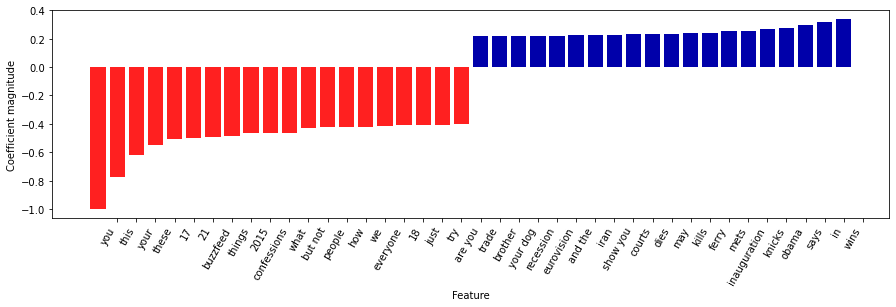

In [ ]:
coefs5 = lr_5.coef_
feature_names5 = vect5.get_feature_names()

visualize_coefficients(coefs5, feature_names5, n_top_features=20)

## Model selection

In [ ]:
table = pd.DataFrame(cv_score, columns=['CV score'], index=['Tokenizer 1', 'Tokenizer 2', 'Tokenizer 3', 'Tokenizer 4', 'Tokenizer 5'])
table['Test score'] = test_score
table['Train AUC'] = AUC_train
table['Test AUC'] = AUC_test
table

,CV score,Test score,Train AUC,Test AUC
Tokenizer 1,0.968507,0.970376,0.999939,0.995608
Tokenizer 2,0.965624,0.965252,0.999283,0.994691
Tokenizer 3,0.945287,0.944436,0.998820,0.988365
Tokenizer 4,0.969948,0.970536,0.999790,0.995556
Tokenizer 5,0.972990,0.970536,0.999946,0.995662


The logistic regression model using tokenizer 5, which uses up to 3-grams in at least 5 documents has the highest CV scores and AUC metrics for both train and test data, so I would choose this model. However, actually all models have quite good prediction performance and perhaps the third model deleting stop-words makes more sense in understanding the situation although its scores are lower.

# Part B: Build a predictive neural network using Keras

Train test split the iris dataset and then run a multilayer perceptron (feed forward neural network) with two hidden layers on the iris dataset using the keras Sequential interface.

Data can be imported via the following link:

http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv

fit two models with different numbers of hidden layers and or hidden neurons and evaluate each on a test-set.  Describe the differences in the predictive accuracy of models with different numbers of hidden units/neurons.  Describe the predictive strength of your best model.  Be sure to explain your choice and evaluate this model using the test set.

## Import Iris data

In [ ]:
# Import libraries
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

In [ ]:
# Import data
import pandas as pd

data = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")

data = data.iloc[:,1:]
y = data['Species']
X = data.loc[:, data.columns != 'Species']

display(pd.get_dummies(y))
display(data.head())
display(X.head())
display(y[0::10])

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0          setosa
10         setosa
20         setosa
30         setosa
40         setosa
50     versicolor
60     versicolor
70     versicolor
80     versicolor
90     versicolor
100     virginica
110     virginica
120     virginica
130     virginica
140     virginica
Name: Species, dtype: object

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, pd.get_dummies(y), stratify=pd.get_dummies(y), random_state=73)

## Model 1: 2 hidden layers

In [ ]:
#Build layers with Dense, followed by Activation()

# two hidden layers with 32 nodes
# Activation is set to relu
# one output layer with 3 categories.  
# softmax function used to calculate 0 to 1 probabilities for each of 3 categories

model = Sequential([
    Dense(32, input_dim=4),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainabl

In [ ]:
# Once your model looks good, configure its learning process with .compile():
sgd = SGD(lr=0.0001)  # define a learning rate for optimization

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Train the model, iterating on the data in batches of 128 samples
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.3339 - accuracy: 0.3393 - val_loss: 1.1905 - val_accuracy: 0.3158
Epoch 2/100
1/1 [==============================] - 0s 36ms/step - loss: 1.1844 - accuracy: 0.3393 - val_loss: 1.1044 - val_accuracy: 0.3158
Epoch 3/100
1/1 [==============================] - 0s 75ms/step - loss: 1.0987 - accuracy: 0.3393 - val_loss: 1.0614 - val_accuracy: 0.3158
Epoch 4/100
1/1 [==============================] - 0s 90ms/step - loss: 1.0553 - accuracy: 0.3750 - val_loss: 1.0394 - val_accuracy: 0.5789
Epoch 5/100
1/1 [==============================] - 0s 56ms/step - loss: 1.0331 - accuracy: 0.6250 - val_loss: 1.0271 - val_accuracy: 0.5789
Epoch 6/100
1/1 [==============================] - 0s 58ms/step - loss: 1.0206 - accuracy: 0.5625 - val_loss: 1.0190 - val_accuracy: 0.4474
Epoch 7/100
1/1 [==============================] - 0s 81ms/step - loss: 1.0124 - accuracy: 0.4464 - val_loss: 1.0127 - val_accuracy: 0.3421
Epoch 8/100
1/1 [=====

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=128) # extract loss and accuracy from test data evaluation
print(score)

1/1 [==============================] - 0s 22ms/step - loss: 0.6489 - accuracy: 0.8684
[0.648918628692627, 0.8684210777282715]


In [ ]:
layers = []
neurons = []
test_score = []

layers.append('2')
neurons.append('32')
test_score.append(score)

In [ ]:
import numpy as np

# Prediction from keras classification model
print(X_test.shape)

# for predicted probabilities
ypreds = model.predict(X_test)
print(ypreds) #gives prediction of each category, largest is selected for predict_classes()

# for predicted label index of one hot encoded y data columns
# Can use this to return correct label from well ordered list of labels
# manually! sklearn does it for us automatically
ypreds_classindex = np.argmax(model.predict(X_test), axis=-1)
print(ypreds_classindex) 

(38, 4)
2/2 [==============================] - 0s 7ms/step
[[0.1676677  0.43332064 0.39901158]
 [0.12401573 0.36985347 0.5061308 ]
 [0.5905548  0.27547905 0.13396618]
 [0.6076416  0.26239654 0.12996182]
 [0.08871158 0.33869365 0.57259476]
 [0.5555872  0.2864698  0.15794311]
 [0.09084964 0.33283862 0.57631177]
 [0.13863216 0.43845332 0.4229146 ]
 [0.5750888  0.2803664  0.14454484]
 [0.10642365 0.4019174  0.49165908]
 [0.1390931  0.45089564 0.4100112 ]
 [0.07955321 0.34496665 0.5754801 ]
 [0.6300552  0.2453058  0.12463909]
 [0.11085299 0.4022421  0.48690498]
 [0.57954836 0.27645808 0.14399353]
 [0.57711303 0.2798853  0.14300174]
 [0.09084964 0.33283862 0.57631177]
 [0.0902886  0.36869165 0.54101974]
 [0.19345275 0.41928577 0.3872615 ]
 [0.1505362  0.42230204 0.4271618 ]
 [0.08340052 0.35456088 0.56203866]
 [0.08173978 0.32490146 0.59335876]
 [0.6589123  0.23074272 0.11034498]
 [0.09491441 0.393815   0.5112705 ]
 [0.58874553 0.2749823  0.13627215]
 [0.5803357  0.27842513 0.14123915]
 [0.1

## Model 2: 3 hidden layers

In [ ]:
#Build layers with Dense, followed by Activation()

# three hidden layers with 32 nodes
# Activation is set to relu
# one output layer with 3 categories.  
# softmax function used to calculate 0 to 1 probabilities for each of 3 categories

model2 = Sequential([
    Dense(32, input_dim=4),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 activation_4 (Activation)   (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 activation_5 (Activation)   (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 3)                

In [ ]:
# Once your model looks good, configure its learning process with .compile():
sgd = SGD(lr=0.0001)  # define a learning rate for optimization

model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Train the model, iterating on the data in batches of 128 samples
model2.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128)

Epoch 1/100
1/1 [==============================] - 1s 657ms/step - loss: 1.1436 - accuracy: 0.3393 - val_loss: 1.1336 - val_accuracy: 0.3158
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 1.1194 - accuracy: 0.3393 - val_loss: 1.1130 - val_accuracy: 0.3158
Epoch 3/100
1/1 [==============================] - 0s 45ms/step - loss: 1.1001 - accuracy: 0.3661 - val_loss: 1.0952 - val_accuracy: 0.4474
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 1.0832 - accuracy: 0.4286 - val_loss: 1.0789 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 1.0678 - accuracy: 0.5446 - val_loss: 1.0637 - val_accuracy: 0.5263
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 1.0533 - accuracy: 0.5982 - val_loss: 1.0493 - val_accuracy: 0.5789
Epoch 7/100
1/1 [==============================] - 0s 46ms/step - loss: 1.0396 - accuracy: 0.6161 - val_loss: 1.0358 - val_accuracy: 0.6316
Epoch 8/100
1/1 [==

In [ ]:
score2 = model2.evaluate(X_test, y_test, batch_size=128) # extract loss and accuracy from test data evaluation
print(score2)

layers.append('3')
neurons.append('32')
test_score.append(score2)

1/1 [==============================] - 0s 24ms/step - loss: 0.4751 - accuracy: 0.8947
[0.47509267926216125, 0.8947368264198303]


In [ ]:
import numpy as np

# Prediction from keras classification model
print(X_test.shape)

# for predicted probabilities
ypreds2 = model2.predict(X_test)
print(ypreds2) #gives prediction of each category, largest is selected for predict_classes()

# for predicted label index of one hot encoded y data columns
# Can use this to return correct label from well ordered list of labels
# manually! sklearn does it for us automatically
ypreds_classindex2 = np.argmax(model2.predict(X_test), axis=-1)
print(ypreds_classindex2) 

(38, 4)
2/2 [==============================] - 0s 5ms/step
[[0.11967087 0.47370926 0.40662   ]
 [0.06479436 0.4191394  0.51606625]
 [0.85179055 0.12951133 0.01869813]
 [0.85803777 0.12364796 0.01831428]
 [0.04167067 0.41791257 0.5404167 ]
 [0.8016676  0.16684048 0.03149197]
 [0.03795452 0.33154002 0.6305053 ]
 [0.0863345  0.4432928  0.47037268]
 [0.82956314 0.14519377 0.02524302]
 [0.05202341 0.39037645 0.55760026]
 [0.09260737 0.48964143 0.41775116]
 [0.03517817 0.35259083 0.6122311 ]
 [0.87847596 0.10784291 0.01368106]
 [0.05888411 0.43948895 0.5016269 ]
 [0.83318895 0.14292194 0.02388896]
 [0.82505816 0.14702778 0.02791415]
 [0.03795452 0.33154002 0.6305053 ]
 [0.03841446 0.3567028  0.60488266]
 [0.15126152 0.4841889  0.36454952]
 [0.09806509 0.46605596 0.4358789 ]
 [0.03367743 0.32406393 0.64225864]
 [0.03520592 0.3804901  0.5843039 ]
 [0.8982676  0.09180441 0.00992797]
 [0.05034452 0.3993576  0.550298  ]
 [0.8456362  0.13292092 0.02144292]
 [0.8340946  0.14121427 0.02469114]
 [0.1

## Model 3: 3 hidden layers with 64 hidden neurons

In [ ]:
#Build layers with Dense, followed by Activation()

# three hidden layers with 64 nodes
# Activation is set to relu
# one output layer with 3 categories.  
# softmax function used to calculate 0 to 1 probabilities for each of 3 categories

model3 = Sequential([
    Dense(64, input_dim=4),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(3),
    Activation('softmax'),
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                320       
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 activation_8 (Activation)   (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 activation_9 (Activation)   (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 3)                

In [ ]:
# Once your model looks good, configure its learning process with .compile():
sgd = SGD(lr=0.0001)  # define a learning rate for optimization

model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# Train the model, iterating on the data in batches of 128 samples
model3.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=128)

Epoch 1/100
1/1 [==============================] - 1s 751ms/step - loss: 1.0480 - accuracy: 0.3304 - val_loss: 1.0224 - val_accuracy: 0.3421
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 1.0213 - accuracy: 0.3304 - val_loss: 1.0066 - val_accuracy: 0.3421
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 1.0058 - accuracy: 0.3304 - val_loss: 0.9942 - val_accuracy: 0.3421
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 0.9935 - accuracy: 0.3304 - val_loss: 0.9841 - val_accuracy: 0.3421
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 0.9834 - accuracy: 0.3304 - val_loss: 0.9751 - val_accuracy: 0.4737
Epoch 6/100
1/1 [==============================] - 0s 48ms/step - loss: 0.9744 - accuracy: 0.4643 - val_loss: 0.9668 - val_accuracy: 0.6579
Epoch 7/100
1/1 [==============================] - 0s 58ms/step - loss: 0.9662 - accuracy: 0.6071 - val_loss: 0.9591 - val_accuracy: 0.6842
Epoch 8/100
1/1 [==

In [ ]:
score3 = model3.evaluate(X_test, y_test, batch_size=128) # extract loss and accuracy from test data evaluation
print(score3)

layers.append('3')
neurons.append('64')
test_score.append(score3)

1/1 [==============================] - 0s 21ms/step - loss: 0.4747 - accuracy: 0.9211
[0.4746572971343994, 0.9210526347160339]


## Model Selection

In [ ]:
table = pd.DataFrame(layers, columns=['Number of hidden layers'], index=['Model 1', 'Model 2', 'Model 3'])
table['Number of hiddern neurons'] = neurons
table['Test score'] = test_score
table

,Number of hidden layers,Number of hiddern neurons,Test score
Model 1,2,32,"[0.648918628692627, 0.8684210777282715]"
Model 2,3,32,"[0.47509267926216125, 0.8947368264198303]"
Model 3,3,64,"[0.4746572971343994, 0.9210526347160339]"


Model 2, adding one more hiddern layer of 32 hidden neurons to Model 1, does not improve predictive accuracy a lot. But adding more hidden neurons in each hiddern layer as in Model 3 improves predictive accuracy to 92.11%.